### Autocorrelation, Autocovariance with the Airline Passengers Dataset

##### Step 1:  Load in the Air Passangers Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, acovf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.simplefilter('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

df = pd.read_csv('../data/AirPassengers.csv', index_col = 'Month', parse_dates = True)

##### Step 2: Pull the head of the dataset, and plot it

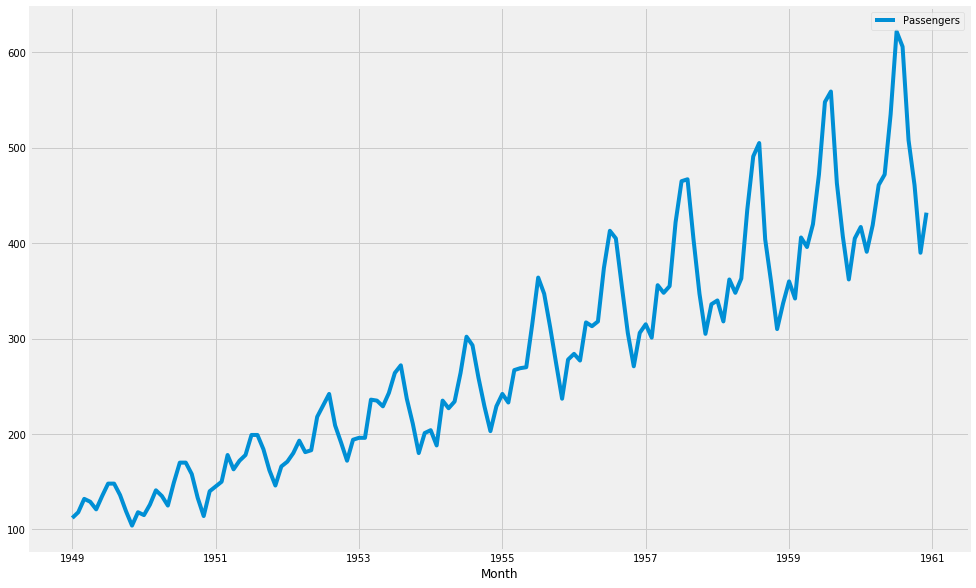

In [2]:
df.head()
df.plot(figsize = (15,10));

##### Step 3:  Calculate the Autocovariance at lag 3:

In [3]:
X_t = df[:-3]['Passengers'] - df['Passengers'].mean()
X_t3 = df[3:]['Passengers'] - df['Passengers'].mean()
X_cov_t3 = np.sum(X_t.values * X_t3.values) * (1 / len(df))
X_cov_t3

11529.065561302403

##### Step 4:  Double Check Your Results Using the `acovf` function in Statsmodels

In [4]:
acovf(df)

array([ 1.42919733e+04,  1.35494673e+04,  1.25136922e+04,  1.15290656e+04,
        1.07565024e+04,  1.02011814e+04,  9.74331848e+03,  9.47421181e+03,
        9.36996756e+03,  9.58917561e+03,  1.00432544e+04,  1.06223690e+04,
        1.08675457e+04,  1.01853302e+04,  9.23750662e+03,  8.37400195e+03,
        7.68844124e+03,  7.14237831e+03,  6.69913401e+03,  6.42953955e+03,
        6.31174697e+03,  6.53462974e+03,  6.89562030e+03,  7.39076513e+03,
        7.60604286e+03,  7.05988744e+03,  6.25590168e+03,  5.53961031e+03,
        4.97396448e+03,  4.50174121e+03,  4.12318884e+03,  3.87029306e+03,
        3.77722715e+03,  3.95600874e+03,  4.26646125e+03,  4.65328239e+03,
        4.81673229e+03,  4.33525371e+03,  3.62983367e+03,  3.01068047e+03,
        2.46066225e+03,  1.97801493e+03,  1.59217215e+03,  1.30034842e+03,
        1.17439675e+03,  1.26873019e+03,  1.48450122e+03,  1.77121603e+03,
        1.89560965e+03,  1.48275264e+03,  8.87503616e+02,  4.11701782e+02,
       -1.15838491e+01, -

##### Step 5:  Plot the Autocorrelations using the `autocorrelation_plot` in Pandas (On The Entire Dataset)

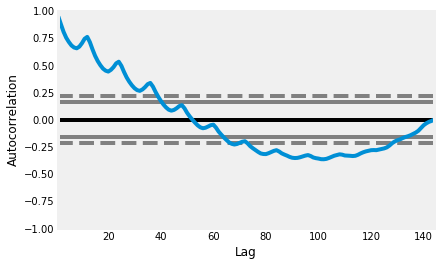

In [5]:
autocorrelation_plot(df);

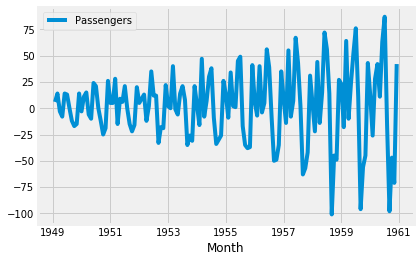

In [6]:
df.diff().plot();

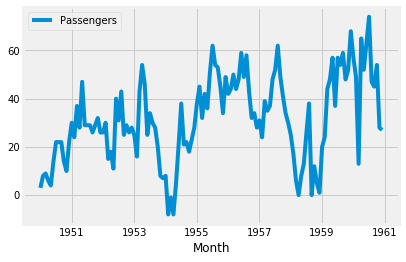

In [7]:
df.diff(periods = 12).plot();

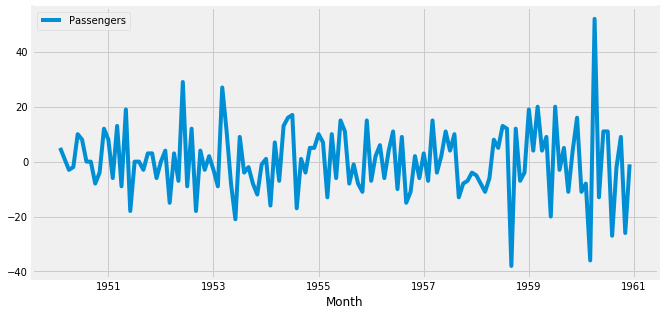

In [8]:
df.diff().diff(periods = 12).plot(figsize = (10,5));

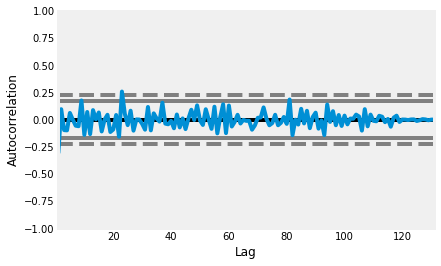

In [9]:
autocorrelation_plot(df['Passengers'].diff().diff(periods = 12)[13:]);

In [11]:
df.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [12]:
prediction = 4.3 + (432*0.7) + (390*0.4)
prediction

462.7

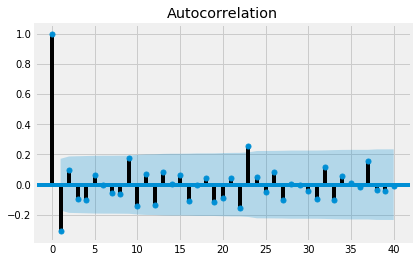

In [14]:
stationary_data = df['Passengers'].diff().diff(periods = 12)[13:]
x = plot_acf(stationary_data, lags = 40)

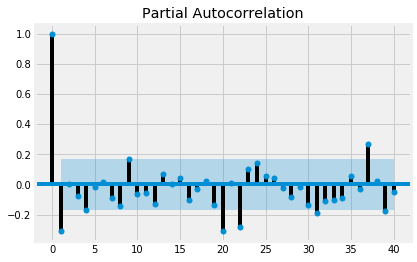

In [15]:
y = plot_pacf(stationary_data, lags = 40)

In [19]:
model = ARIMA(df['Passengers'], order = (1,1,1))
results = model.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.073
Method:                       css-mle   S.D. of innovations             31.338
Date:                Mon, 26 Aug 2019   AIC                           1402.145
Time:                        19:25:18   BIC                           1413.997
Sample:                    02-01-1949   HQIC                          1406.961
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6112      0.228     11.435      0.000       2.164       3.059
ar.L1.D.Passengers     0.7400      0.058     12.778      0.000       0.626       0.854
ma.L1.D.Passengers  

In [20]:
results.forecast()

(array([443.49287296]),
 array([31.33795587]),
 array([[382.07160811, 504.9141378 ]]))

In [21]:
results.forecast(steps = 3)

(array([443.49287296, 452.67650965, 460.1513094 ]),
 array([31.33795587, 38.98524333, 42.59506275]),
 array([[382.07160811, 504.9141378 ],
        [376.26683681, 529.0861825 ],
        [376.6665205 , 543.6360983 ]]))